1. Write a program that displays a temperature conversion table for degrees Celsius and degrees Fahrenheit. The table should include rows for all temperatures between 0 and 100 degrees Celsius that are multiples of 10 degrees Celsius. Include appropriate headings on your columns. The formula for converting between degrees Celsius and degrees Fahrenheit is as follows.

T(\\deg F) = T(\\deg C) * 1.8 +32  

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3

In [8]:
t = np.arange(0,101,10)
faren = t*1.8+32
df = pd.DataFrame({'Celsius':t, 'Farenheit':faren})
df

,Celsius,Farenheit
0,0,32.0
1,10,50.0
2,20,68.0
3,30,86.0
4,40,104.0
5,50,122.0
6,60,140.0
7,70,158.0
8,80,176.0
9,90,194.0


2. Write a Python code that will load the Volve daily production data from the attached \"Volve production data.xlsx\" file. This is stored in the first tab of the Excel sheet.

     Open the Excel sheet with Microsoft Excel and observe that Column D contains the well names; Columns J and K contain the average bottomhole pressure and temperature, respectively; Column R contains the choke sizes; Columns S, T and U contain the daily oil, gas and water production rates, respectively; Column V contains the daily water injection rates; while Column W tells you whether the well is a production well or an injection well.
     
     
3. Write a Python code that will create a database called \"VolveProduction.db\
4. Store all of the data loaded from \"Volve production data.xlsx\" into a Database table named \"DailyRates\".
5. Query the DailyRates table and store the choke sizes for the wells using wellbore codes \"7078\" into a dataframe named \"testWellDF\"
6. Plot choke size data on the secondary axis and oil rate on the primary axis for each of the production wells in the Volve data.


In [24]:
filename = 'Volve production data.xlsx'
xl = pd.ExcelFile(filename)
dailyDF = xl.parse('Daily Production Data')

conn = sqlite3.connect('VolveProduction.db')
cur = conn.cursor()

dailyDF.to_sql("DailyRates", conn, if_exists="append", index=False)



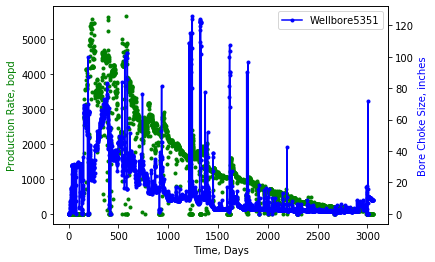

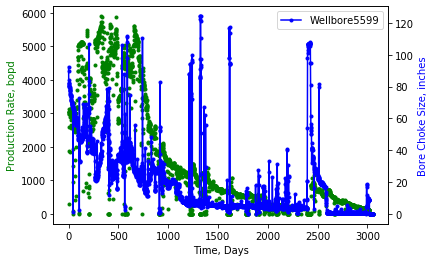

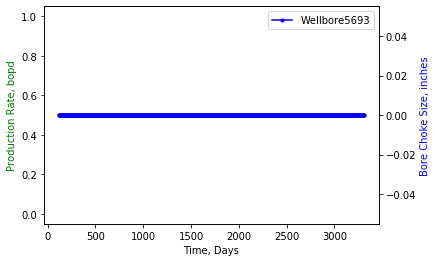

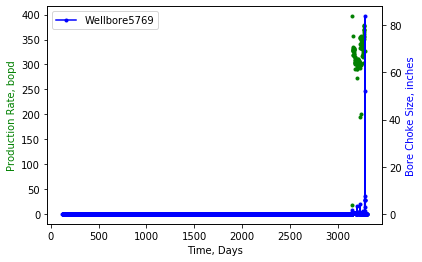

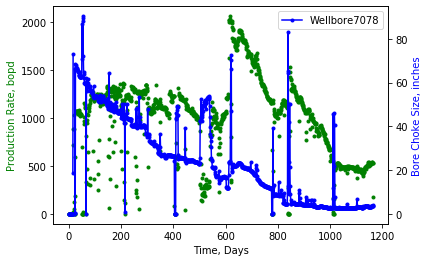

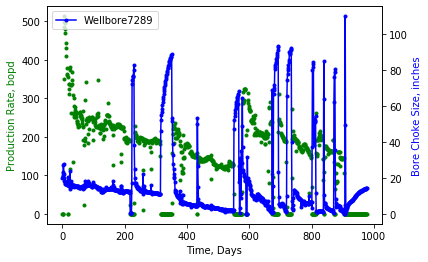

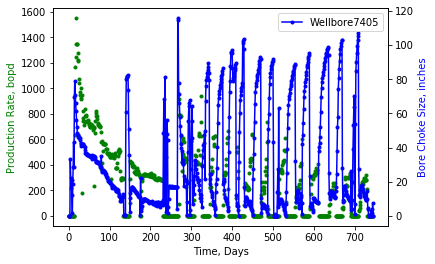

In [25]:
wellbore = [5351, 5599, 5693, 5769, 7078, 7289, 7405]

for i in wellbore:
    testWellDF = pd.read_sql_query(f"SELECT DP_CHOKE_SIZE, BORE_OIL_VOL FROM DailyRates WHERE NPD_WELL_BORE_CODE={i};", conn)
    fig, ax1 = plt.subplots()

    ax2 = ax1.twinx()
    ax1.plot(testWellDF['BORE_OIL_VOL'], color="green", ls='None', marker='o', markersize=3,)
    ax2.plot(testWellDF['DP_CHOKE_SIZE'], color="blue", ls='solid', marker='o', markersize=3, label='Wellbore'+str(i))
    
    ax1.set_xlabel('Time, Days')
    ax1.set_ylabel('Production Rate, bopd', color='g')
    ax2.set_ylabel('Bore Choke Size, inches', color='b')
    plt.legend()
    
    plt.show
    